# 05 데이터 전처리

데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요하다 

ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다. (Garbage In, Garbage Out)  

사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야할 것들이 있다.
결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야한다. Null 값을 어떻게 처리해야 할지는 경우에 따라 다르며 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 대체할 수 있다. 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다.  

가장 결정이 힘든 부분은 Null 값이 일정 수준 이상 되는 경우이다. 정확히 몇 퍼센트까지를 일정 수준 이상이라고 한다는 기준은 없다. 하지만 해당 피처가 중요도가 높은 피처이고 Null 을 단순히 피처의 평균값을 대체할 경우 예측 왜곡이 심할 수 있다면 업무로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야한다.  

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 이미한다. 카테고리형 피처는 코드 값으로 표현하는게 더 이해하기 쉬울 것이다. 텍스트형 피처는 피처 벡터화(feature vectorization)등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는게 좋다. 이러한 식별자 피처는 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 예측에 중요한 요소가 될 수 없으며 알고리즘을 오히려 복잡하게 만들고 예측 성능을 떨어뜨리기 때문이다.

## 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot-encoding)이 있다.  

레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다.  
예를들면 여자는 1로, 남자는 2로 숫자형 값으로 변환하는 것  

### 레이블 인코딩
사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현한다.  
LabelEncoder를 객체로 생성한 후 fit( )과 transform( )을 호출해 레이블 인코딩을 수행한다.

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환됨  

위의 예제는 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩 됐는지 직관적으로 알 수 있지만, 많은 경우에 이를 알지 못한다.  
그런 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인하면 된다.

In [2]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있다.  
inverse_transform( )을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [3]:
print('디코딩 원본값: ',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML알고리즘에는 이를 적용할 경우 예측이 떨어지는 경우가 발생할 수 있다. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 특정 ML알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 하지만 냉장고와 믹서의 숫자 변환 값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안된다. 이러한 특성 때문에 레이블 인코딩은 **선형회귀와 같은 ML알고리즘**에는 적용하지 않아야 한다. **트리 계열의 ML알고리즘**은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없다.

### 원-핫 인코딩(One-Hot Encoding)
원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표현하는 방식이다.  
즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 변환이 가능하다. 단, LabelEncoder와 다르게 약간 주의할 점이 있다. 입력값으로 2차원 데이터가 필요하다는 것과 OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray( )메서드를 이용해 밀집 행렬(Dense Matix)로 변환해야 한다. 

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환한다.
items = np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용한다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


-> 8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환  
- TV:0, 냉장고:1, 믹서:2, 선풍기:3, 전자레인지:4, 컴퓨터:5로 인코딩
- 첫번재 칼럼:TV, 두번재 칼럼:냉장고, 세번재 칼럼:믹서, 네번재 칼럼:선풍기, 다섯번재 칼럼:전자레인지, 여섯번재 칼럼:컴퓨터

판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다.  
get_dummies( )를 사용하면 된다. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [5]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


-> get_dummies( )를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능하다.

## 피처 스케일링과 정규화

- 피처 스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적인 방법 : 표준화(Standardization), 정규화(Normalization)  

- 표준화 : 데이터의 피처 각각이 평규이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미
    - xi_new = (xi-mean(x)) / (stdev(x)) [x의 새로운 i번째 데이터를 xi_new]  

일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것.  
새로운 데이터 xi_new는 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환할 수 있다.  
        **xi_new = (xi-min(x)) / (max(x) - min(x))**  
    
그러나 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다.  
사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다.  
즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 세 개의 피처 x,y,z가 있다고 하면 새로운 데이터 xi_new는 원래 값에서 세개의 피처의 i번째 피처값에 해당하는 크기를 합한 값으로 나눠준다.  
        **xi_new = xi / sqrt(xi^2 + y^2 + z^2)**

## StandardScaler

StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다.  
즉, 개별 피처를 평균이 0이고 분산이 1인 값으로 변환해준다.  
사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('featrue들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

featrue들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


-> StandardScaler을 이용한 데이터 값 변환

In [7]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('featrue들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

featrue들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


-> StandardScaler를 이용해 각 피처를 한번에 표준화 변환  
StandardScaler 객체 생성 후 fit( )과 transform( )메서드에 변환 대상 피처 데이터 세트를 입력하고 호출  
transform( )을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산값 확인

## MinMaxScaler

MinMaxScaler는 데이터 값을 0과 1 사이의 범위 값으로 변환한다(음수 값이 있으면 -1에서 1값으로 변환)  
데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [9]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit( ), transform( ), fit_transform( ) 메서드를 이용한다.  
- 일반적으로 fit( )은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform( )은 이렇게 설정된 정보를 이용해 데이터를 변환한다.
- fit_transform( )은 fit( )과 transform( )을 한번에 적용하는 기능을 수행한다.  

**주의점**  
- Scaler 객체를 이용해 학습 데이터 세트로 fit( )과 transform( )을 적용하면 테스트 데이터 세트로는 다시 fit( )을 수행하지 않고 학습 데이터 세트로 fit( )을 수행한 결과를 이용해 transform( ) 변환을 적용해야 한다.
- 즉, 학습 데이터로 fit( )이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [11]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Sclaed된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Sclaed된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


-> 학습 데이터인 train_array부터 MinMaxScaler를 이용해 변환  
학습 데이터에 MinMaxScaler 객체의 fit( )을 적용하면 최솟값 0, 최댓값 10이 설정되며 1/10 Scale이 적용된다.

In [12]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Sclaed된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Sclaed된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


-> 테스트 데이터 세트 변환

- 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다.
- 테스트 데이터의 경우는 최솟값0, 최댓값5이므로 1/5로 스케일링된다.
- 따라서 원본값 1은 0.2로, 원본값 5는 1로 변환이 된다.
- 앞서 학습 데이터는 스케일링 변환으로 원본값 2가 0.2로 변환됐고, 원본값 10이 1로 변환됐다.
- 이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과 초래  


- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1값으로 변환돼야 한다.
- 따라서 테스트 데이터에 다시 fit( )을 적용해서는 안되며 학습 데이터로 이미 fit( )이 적용된 Scaler객체를 이용해 transform( )으로 변환해야한다.

In [13]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Sclaed된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Sclaed된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Sclaed된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Sclaed된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


-> 테스트 데이터에 fit( )을 호출하지 않고 학습 데이터로 fit( )을 수행한 MinMaxScaler 객체의 transform( )을 이용해 데이터 변환  

fit_transform( )을 적용할 때도 마찬가지이다. fit_transform( )은 fit( )과 transform( )을 순차적으로 수행하는 메서드이므로 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용해서는 안된다.  

이렇게 학습과 테스트 데이터에 fit( )과 transfrom( )을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 셑로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직하다.  

**학습데이터와 테스트데이터의 fit( ), transform( ), fit_transform( )을 이용해 스케일링 변환시 유의할 점**  
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 ㅇ낳다면 테스트 데이터 변환 시에는 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( )된 Sclaer 객체를 이용해 transform( )으로 변환  

이 유의사항은 사이킷런 기반의 PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용된다.

# 06 사이킷런으로 수행하는 타이타닉 생존자 예측

타이타닉 탑승자 데이터
- Passengerid : 탑승자 데이터 일련번호
- survived : 생존여부, 0=사망, 1=생존
- pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
- sex : 탑승자 성별
- name : 탑승자 이름
- Age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C=Cherbourg, Q=Queenstown, S=Southampton

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df = pd.read_csv('Data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
print('\n### 학습 데이터 정보### \n')
print(titanic_df.info())


### 학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- info( )메서드를 통해 DataFrame의 데이터 칼럼 타입 확인

- RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다.
- 판다스의 object 타입은 string타입으로 봐도 무방하다.
- 판다스는 넘파이 기반으로 만들어졌고 넘파이의 String 타입이 길이 제한이 있어서 이에 대한 구분을 위해 object 타입으로 명기한 것이다.  


- 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야한다.
- DataFrame의 fillna( ) 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수  0


In [20]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것 같다.
- Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫번째 알파벳이 중요해보임
- Cabin 속성의 경우 앞 문자만 추출

In [21]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [22]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

-> 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수 비교  
- Survived 칼럼은 레이블로서 결정 클래스 값
- Survived 0은 사망, 1은 생존

시본(Seaborn)패키지를 이용해 시각화  
시본은 기본적으로 맷플롯립에 기반하고 있지만, 좀 더 세련된 비주얼과 쉬운 API, 편리한 판다스 DataFrame과의 연동 등으로 데이터 분석을 위한 시각화로 애용되는 패키지이다.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

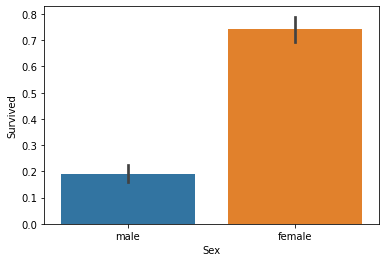

In [23]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

X축에 'Sex'칼럼, Y축에 'Survived'칼럼, 그리고 이들 데이터를 가져올 데이터로 DataFrame 객체명 입력하고 barplot( )함수 호출

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

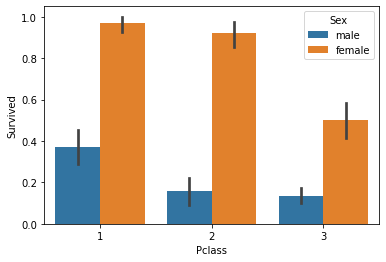

In [24]:
sns.barplot(x='Pclass',y='Survived',hue = 'Sex', data=titanic_df)

X축에 'Pclass'칼럼, Y축에 'Survived'칼럼, hue='Sex' 그리고 이들 데이터를 가져올 데이터로 DataFrame 객체명 입력하고 barplot( )함수 호출

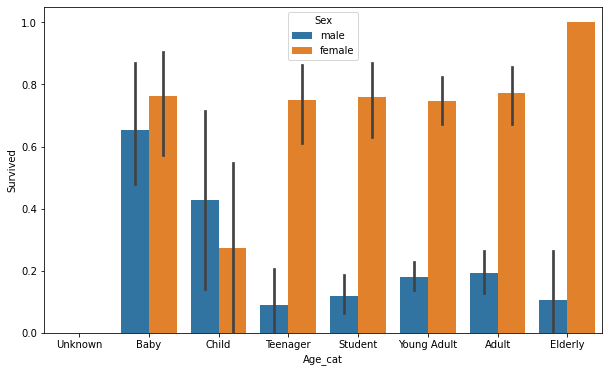

In [25]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용
def get_category(age):
    cat =''
    if age<=-1: cat = 'Unknown'
    elif age<=5 : cat = 'Baby'
    elif age<=12 : cat = 'Child'
    elif age<=18 : cat = 'Teenager'
    elif age<=25 : cat = 'Student'
    elif age<=35 : cat = 'Young Adult'
    elif age<=60 : cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당 

In [26]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리 유형수-1)까지의 숫자 값으로 변환한다.  
사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit( ), transform( )으로 데이터를 변환한다.  

Sex, Cabin, Embarked 속성이 숫자형으로 바뀌었다.

In [27]:
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features( )이며 Null처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성했다.
- 불필요한 피처 제거는 drop_features(df)로 수행하며 머신러닝 알고리즘에 불필요한, 단순한 식별자 수준의 피처인 PassengerId, name, Ticket 피처를 제거한다.

In [28]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('Data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

- 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트 생성  
- Survived 속성을 드롭해 피처 데이터 세트 생성

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

사이킷런은 결정 트리를 위해서 DecisionTreeClassifier, 랜덤 포레스트를 위해 RandomForestClassifier, 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공한다.  

사이킷런 클래스를 이용해 train_test_split( )으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)할 것이다.  
예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score( ) API를 사용한다.  
DecisionTreeClassifier와 RandomForestClassifier에 생성 인자로 입력된 random_state = 11은 예제 수행할 때마다 같은 결과를 출력하기 위한 용도일뿐이니 실제 사례에서는 제거해도 된다.  
LogisticRegression의 생성 인자로 입력된 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것이다. 일반적으로 작은 데이터 세트에서의 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있다.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
RandomForestClassifier 정확도:0.8659


In [31]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores=[]
    
    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index todtjd
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    #5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

print("평균 정확도:{0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도:0.7879


cross_val_score( )와 방금 전 K 폴드의 평균 정확도가 약간 다른데, 이는 cross_val_score( )가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서으 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서으 DecisionTreeClassifier 정확도 : 0.8715


최적화된 하이퍼 파라미터인 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정학도가 향상했다. 